In [12]:
import pywt
import numpy as np
import h5py
from tools import *
from matplotlib import pyplot as plt 

In [13]:
h5_datas = h5py.File("../ml_project_data/h5/X_train.h5/X_train.h5","r")

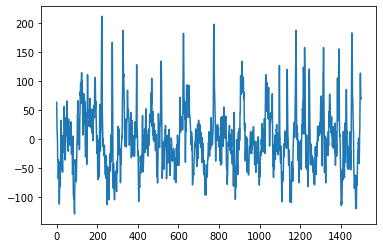

In [14]:
sf = 50
demo_signal = h5_datas["eeg_1"][6]
time = np.arange(demo_signal.size) / sf
plt.plot(demo_signal)

Classic wavelet transform where we compute the average energy

In [15]:
subbands = pywt.wavedec(demo_signal, 'db2',level=10)[1:]

In [16]:
mean_energy =  lambda x: np.sum(x*x)/x.size
feature_vector = [mean_energy(subband) for subband in subbands]
feature_vector

[26423.375,
 29076.671875,
 9869.1943359375,
 48778.875,
 31614.45673076923,
 26167.683673469386,
 6486.12109375,
 2605.4366776315787,
 1069.4476127320954,
 182.86963215712385]

In [17]:
treat_record_dwt(demo_signal)

[26423.375,
 29076.671875,
 9869.1943359375,
 48778.875,
 31614.45673076923,
 26167.683673469386,
 6486.12109375,
 2605.4366776315787,
 1069.4476127320954,
 182.86963215712385]

Wavelet Packet where we compute energy

In [18]:
subband_p = pywt.WaveletPacket(demo_signal,"sym3",maxlevel=3)

In [19]:
leaf_subbands=np.array([n.data for n in subband_p.get_leaf_nodes(True)])
leaf_name = np.array([n.path for n in subband_p.get_leaf_nodes(True)])
leaf_name

array(['aaa', 'aad', 'ada', 'add', 'daa', 'dad', 'dda', 'ddd'],
      dtype='<U3')

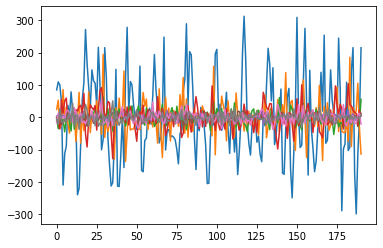

In [20]:
plt.plot(leaf_subbands.T);

In [21]:
feature_vector_p = [mean_energy(subband) for subband in leaf_subbands]
feature_vector_p

[16163.89005235602,
 2975.288612565445,
 480.1892997382199,
 1353.0916230366493,
 65.31964271106021,
 99.08497627617801,
 273.62884489528795,
 214.25740346858638]

In [22]:
treat_record_wpt(demo_signal)

{'aaa': 16163.89005235602,
 'aad': 2975.288612565445,
 'ada': 480.1892997382199,
 'add': 1353.0916230366493,
 'daa': 65.31964271106021,
 'dad': 99.08497627617801,
 'dda': 273.62884489528795,
 'ddd': 214.25740346858638}